In [1]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
# "the default sans-serif font is Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 10})

In [2]:
# Read networkx graph object
power_grid_USA = nx.read_gpickle("power_grid_USA.gpickle")
# Get its adjacency matrix
AM = nx.adjacency_matrix(power_grid_USA).todense()

In [3]:
AM = np.array(AM)

In [4]:
# Construct the transition pribability matrix from the adjacency matrix
def constructtransition(am):
    n = len(am)
    # First construct the standard adjacency matrix 
    sam = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if am[i][j] !=0:
                sam[i][j] = 1
    tm = np.zeros((n, n))
    for k in range(n):
        tk = sam[k] / np.sum(sam[k])
        tm[k] = tk
    return tm        

In [5]:
TM = constructtransition(AM)

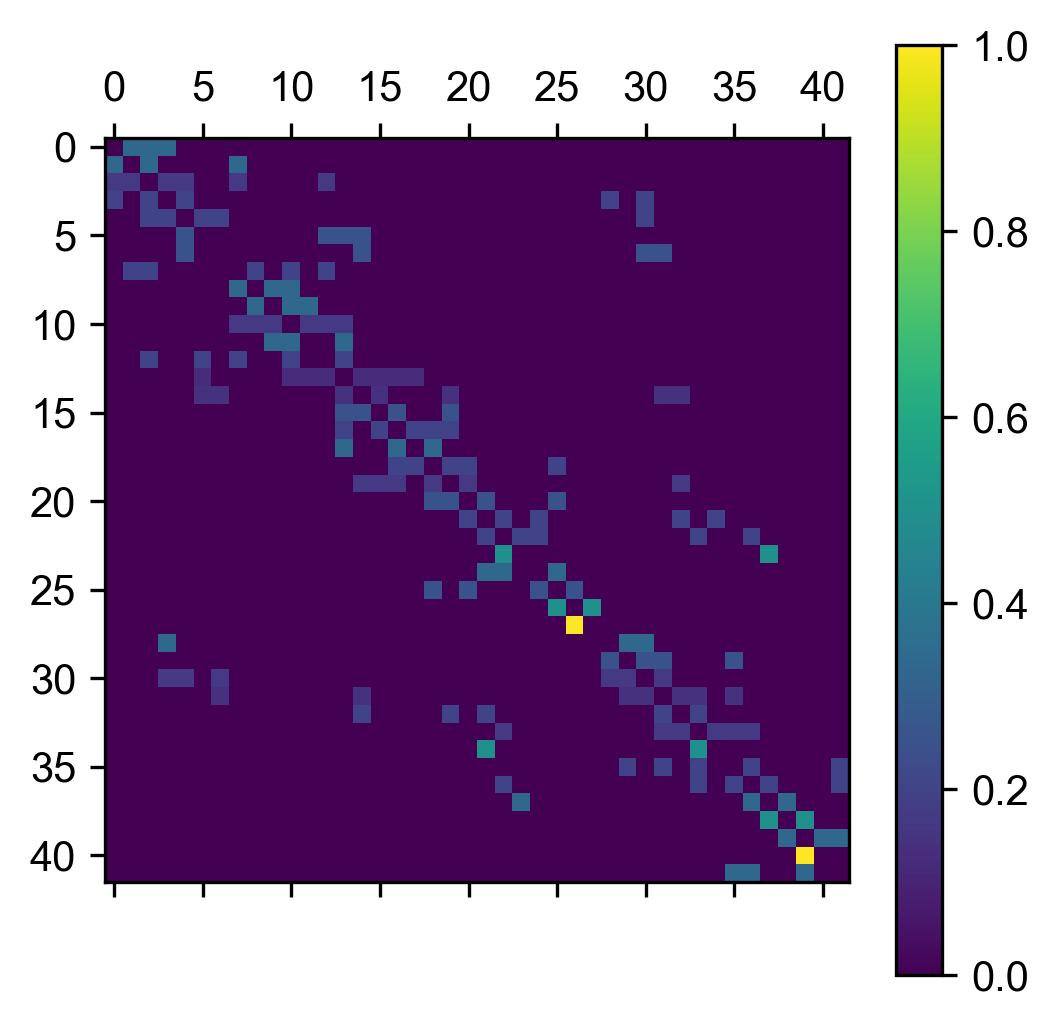

In [15]:
plt.matshow(TM)
plt.colorbar()
plt.rcParams['figure.figsize'] = (6, 4) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
plt.savefig(r"%s.jpg"%('TransitionMatrix'), bbox_inches='tight')
plt.show()

In [19]:
# Find the index of 'Houston', 'Chicago', 'Seattle' 
IH = list(power_grid_USA.nodes()).index('Houston')
IC = list(power_grid_USA.nodes()).index('Chicago')
IS = list(power_grid_USA.nodes()).index('Seattle')

In [13]:
# Estimate the long-term probability
def longterm(p0, pt):
    pn1 = p0
    while True:
        pn = np.matmul(pn1, pt)
        dist = np.linalg.norm(pn-pn1)
        pn1 = pn
        if dist < 1e-5:
            break
    return pn   

In [21]:
P0 = np.zeros(42)
P0[0] = 1

In [22]:
PN = longterm(P0, TM)

In [23]:
PN

array([0.01725973, 0.01726231, 0.0345194 , 0.02875593, 0.02875373,
       0.02300446, 0.02299363, 0.02877232, 0.0172652 , 0.01726474,
       0.03452555, 0.01726167, 0.02876624, 0.04600931, 0.04023778,
       0.02299554, 0.02874314, 0.01724678, 0.02873321, 0.0344822 ,
       0.0229795 , 0.02871251, 0.0287017 , 0.01147606, 0.01722573,
       0.02297567, 0.01148618, 0.0057428 , 0.01724632, 0.02298483,
       0.0344916 , 0.04021984, 0.02872483, 0.03445237, 0.01148388,
       0.02871   , 0.02869709, 0.01721073, 0.01147057, 0.01720563,
       0.00573438, 0.0172149 ])

In [24]:
PN[31]

0.040219842574014245

In [20]:
IS

0

In [ ]:
city_coordinates = {}
for node in power_grid_USA.nodes:
    city_coordinates[node] = power_grid_USA.nodes[node]['pos']

nx.draw(power_grid_USA, with_labels=True, pos=city_coordinates)
plt.show()

In [18]:
P = np.matmul(P0, TM)

In [19]:
P

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 0.33333333, 0.        , 0.33333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [26]:
print(9*200*31/41)

1360.9756097560976


In [35]:
def calculation(t):
    a = t**3-3*t**2-3*t+11
    b = 3*(1-t**2+2*t)
    return a/b

In [38]:
r = calculation(1.5)

In [39]:
r

0.5952380952380952